In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1. Read the data

In [9]:
excel_path = 'EastWestAirlines.xlsx'

data = pd.read_excel(excel_path, sheet_name='data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [14]:
missing_values = data.isnull().sum()
missing_values

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

##### no null or missing values in the dataset

In [15]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


##### We can remove the ID column as it is not required for clustering

In [18]:
data.drop("ID#",axis=1, inplace=True)


In [20]:
data.drop("Award?",axis=1, inplace=True)

In [22]:
data[data.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
3876,1000,0,1,1,1,0,0,0,0,1597


In [23]:
data.drop_duplicates(inplace=True)
data.reset_index()

,index,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0,28143,0,1,1,1,174,1,0,0,7000
1,1,19244,0,1,1,1,215,2,0,0,6968
2,2,41354,0,1,1,1,4123,4,0,0,7034
3,3,14776,0,1,1,1,500,1,0,0,6952
4,4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...,...
3993,3994,18476,0,1,1,1,8525,4,200,1,1403
3994,3995,64385,0,1,1,1,981,5,0,0,1395
3995,3996,73597,0,3,1,1,25447,8,0,0,1402
3996,3997,54899,0,1,1,1,500,1,500,1,1401


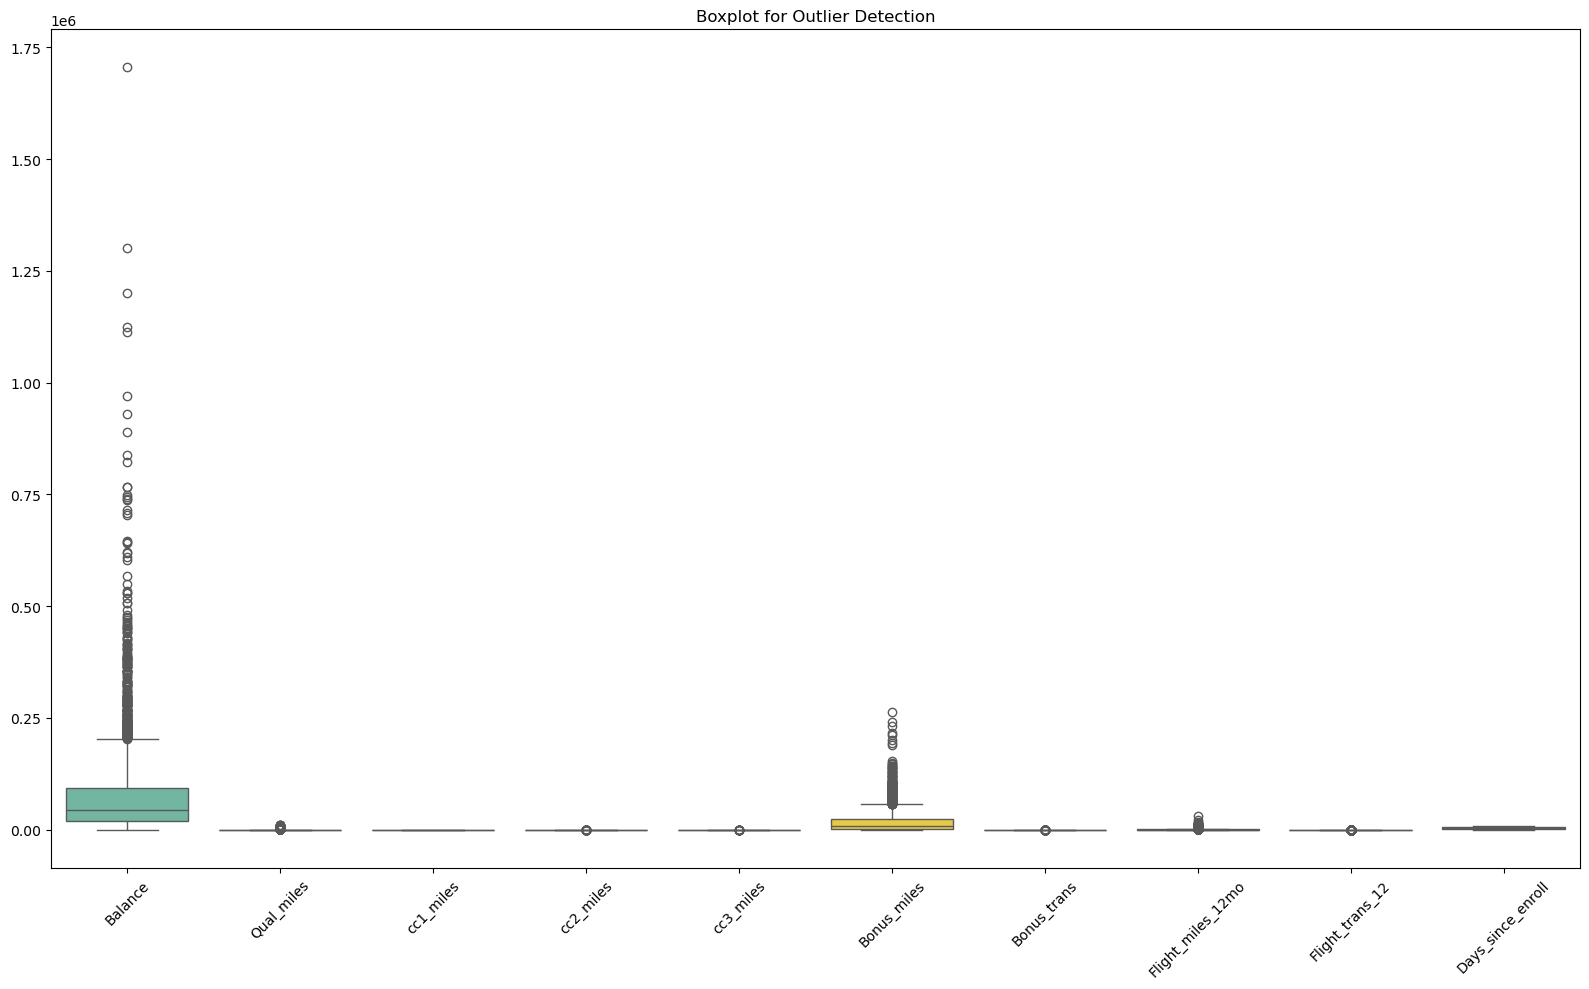

In [24]:
# Boxplot to visualize outliers
plt.figure(figsize=(16, 10))
sns.boxplot(data, palette="Set2")
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#####  Some features (like Balance, Bonus_miles, Flight_miles_12mo) show high variance and extreme max values, indicating potential outliers.

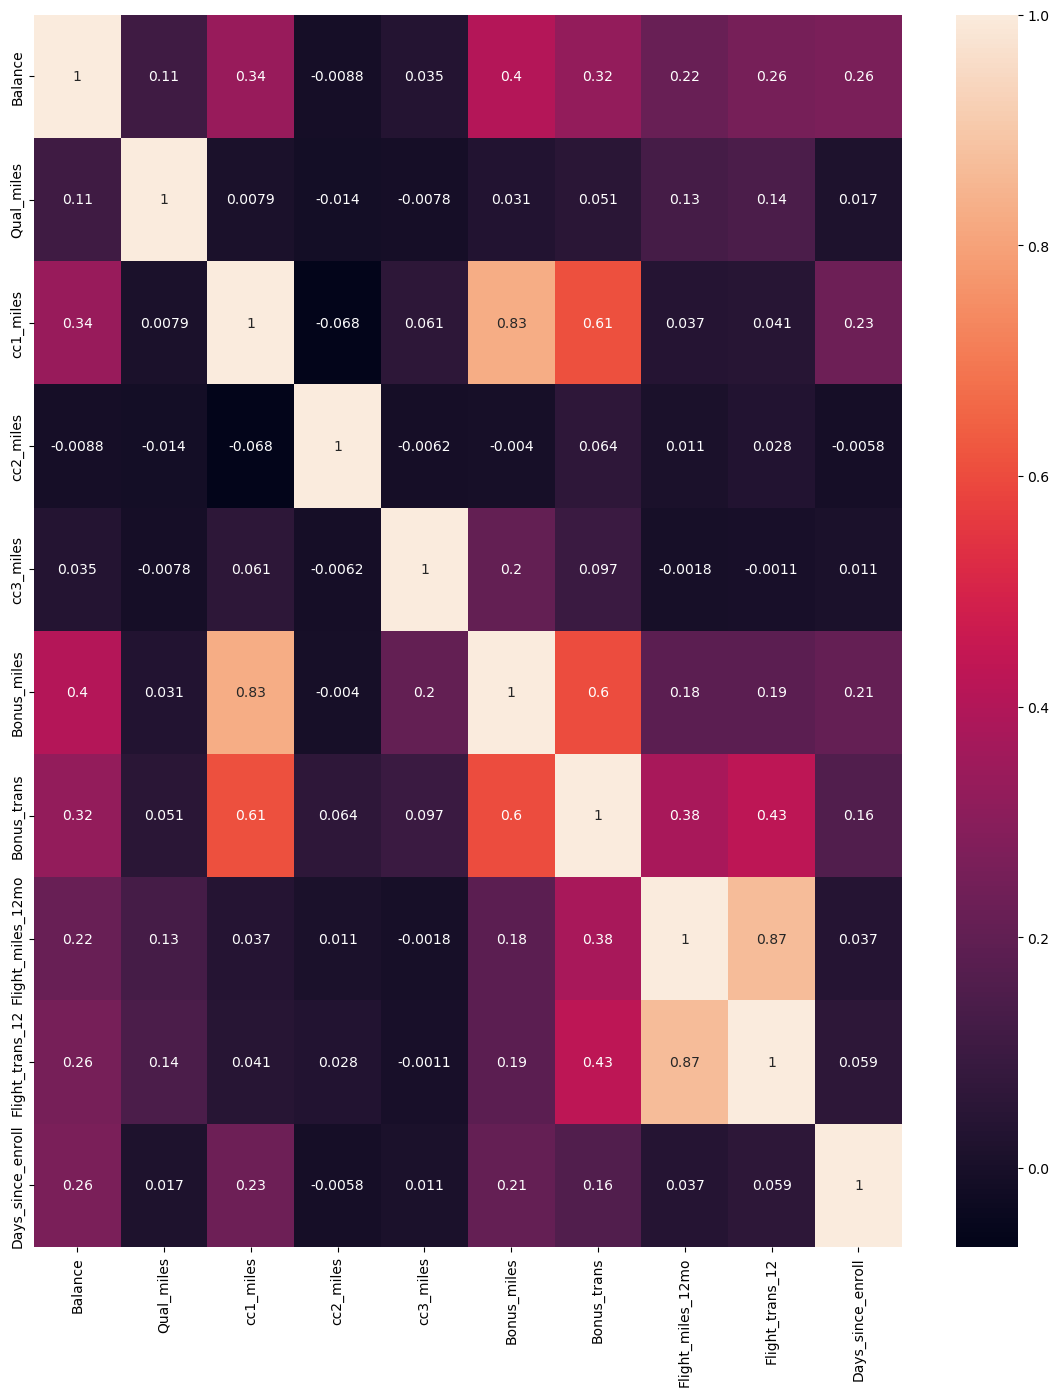

In [28]:
plt.figure(figsize=(14,16))
correlation=data.corr()
sns.heatmap(correlation,annot=True)
plt.show()

## clustering algorithms

### 1. K-Means 

##### standardize the data for kmeans

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler=StandardScaler()

In [31]:
scaled_data=scaler.fit_transform(data)

##### build the model

In [32]:
from sklearn.cluster import KMeans

In [33]:
# we need to get k-value from knee plot

##### knee plot

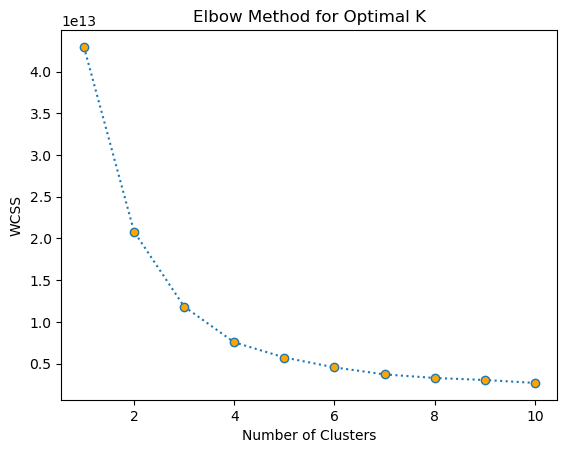

In [42]:
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=42)
    model.fit(data)
    inertia=np.round(model.inertia_,2)
    wcss.append(inertia)
plt.plot(range(1,11),wcss,
         marker='o',markerfacecolor='orange', linestyle='dotted')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [61]:
# Fit optimal KMeans (assume k=5 based on elbow)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)


In [52]:
# we have obtained 5 different groups based on the labels

## 2. Heirarchical clustering

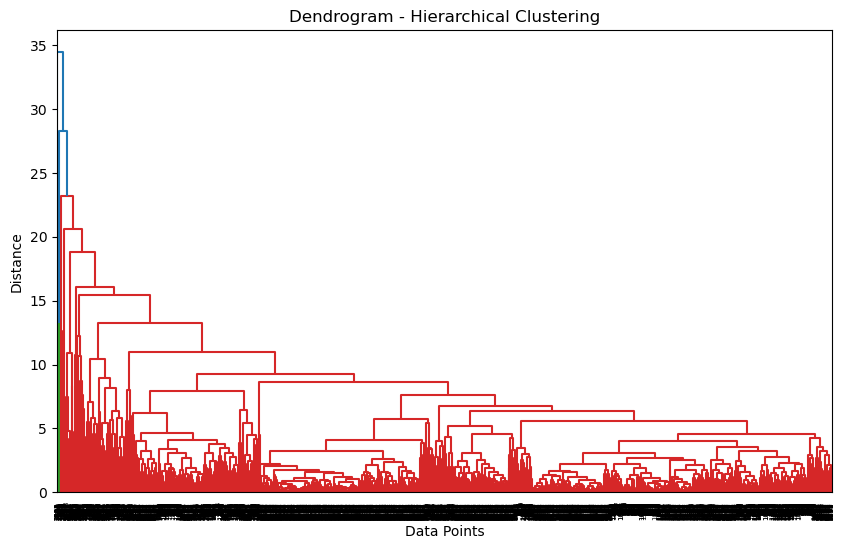

In [64]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='complete'))
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Apply Agglomerative Clustering (assume 5 clusters)
hc = AgglomerativeClustering(n_clusters=5,linkage='complete',metric="euclidean")
hc_labels = hc.fit_predict(scaled_data)

## 3. DBSCAN

In [65]:
from sklearn.cluster import DBSCAN

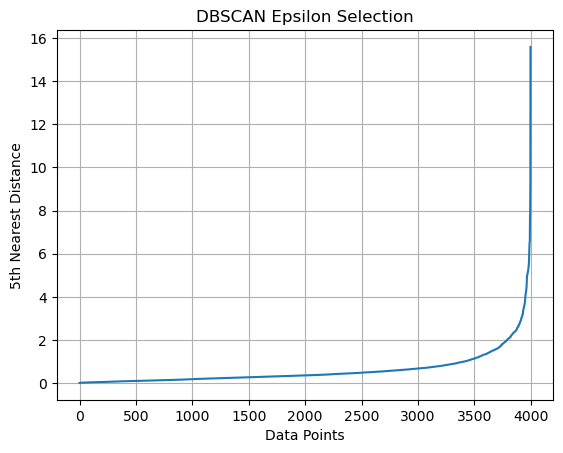

In [66]:
from sklearn.neighbors import NearestNeighbors


# Find optimal eps using k-nearest neighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(scaled_data)
distances, indices = nbrs.kneighbors(scaled_data)
distances = np.sort(distances[:, 4])  # 4 = n_neighbors-1

plt.plot(distances)
plt.ylabel("5th Nearest Distance")
plt.xlabel("Data Points")
plt.title("DBSCAN Epsilon Selection")
plt.grid()
plt.show()

In [67]:
# Fit DBSCAN with chosen eps (try 2.0 to start, tune as needed)
dbscan = DBSCAN(eps=2.0, min_samples=5)
db_labels = dbscan.fit_predict(scaled_data)

## visualization

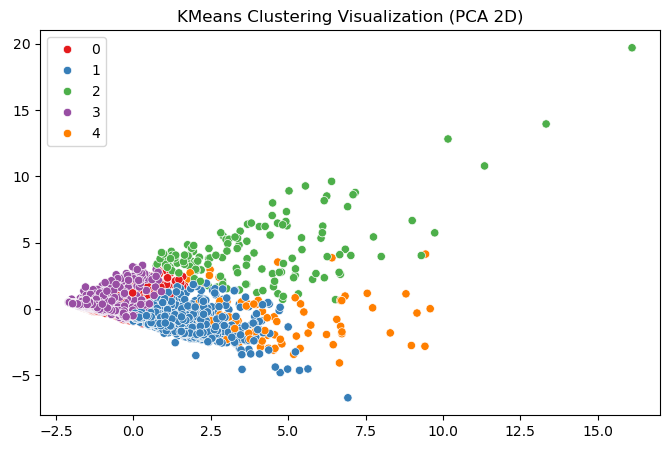

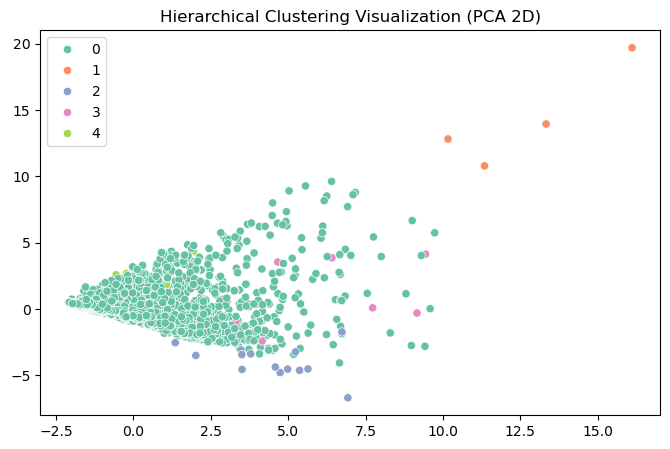

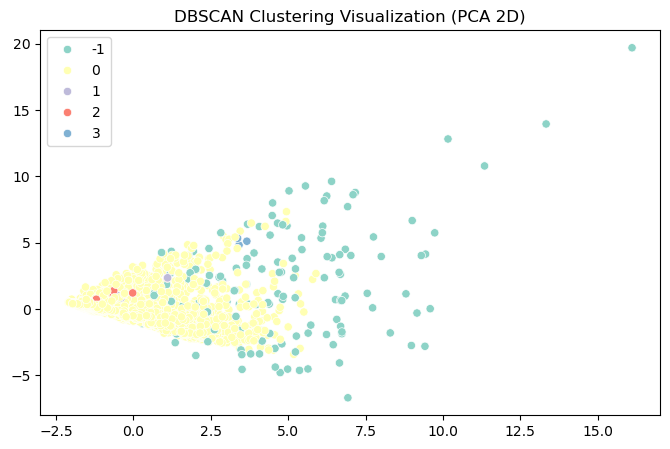

In [69]:
# Create a dataframe with first 2 PCA components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot KMeans clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_labels, palette='Set1')
plt.title("KMeans Clustering Visualization (PCA 2D)")
plt.show()

# Plot Hierarchical clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=hc_labels, palette='Set2')
plt.title("Hierarchical Clustering Visualization (PCA 2D)")
plt.show()

# Plot DBSCAN clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=db_labels, palette='Set3')
plt.title("DBSCAN Clustering Visualization (PCA 2D)")
plt.show()

## Analysis

##### to analyse the clusters we add the predicted cluster labels (from KMeans, Hierarchical, and DBSCAN) to the original dataset.then group by each cluster label.Calculate the mean of each feature per cluster to understand common traits.

In [73]:
# KMeans interpretation
data['KMeans_Cluster'] = kmeans_labels
print(data.groupby('KMeans_Cluster').mean())

# Hierarchical interpretation
data['Hierarchical_Cluster'] = hc_labels
print(data.groupby('Hierarchical_Cluster').mean())

# DBSCAN interpretation
data['DBSCAN_Cluster'] = db_labels
print(data[data['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').mean())


                      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                               
0                55012.768756  170.933804   1.180936   1.038835   1.000883   
1                93439.824112  106.417836   3.725846   1.000826   1.037159   
2               131581.081481  669.622222   2.074074   1.044444   1.000000   
3                35248.135173   84.455768   1.197452   1.004246   1.000000   
4               483741.075472  415.462264   3.896226   1.009434   1.028302   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                  
0                4883.518976     7.386584         258.897617         0.796999   
1               37804.493807    18.633361         292.835673         0.858794   
2               29179.955556    28.096296        5896.703704        16.918519   
3                4274.041047     6.570418       

##### we can see dbscan has a lot of noise whereas kmeans and heirarchical seems to perform well with the data.
##### for kmeans the clustering has been based on tghe frequency of travel and the flight/trans as a result grouping people as inactive members, regular customers etc
##### in herirarchical again we have 4 clusters and all the clusters are balanced and clustering is based on the travel frequency and flight/trans


## silhouette score 

In [74]:
from sklearn.metrics import silhouette_score

In [75]:
kmeans_sil_score = silhouette_score(scaled_data, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_sil_score:.3f}")

KMeans Silhouette Score: 0.242


In [76]:
hc_sil_score = silhouette_score(scaled_data, hc_labels)
print(f"Hierarchical Clustering Silhouette Score: {hc_sil_score:.3f}")

Hierarchical Clustering Silhouette Score: 0.664


In [77]:
if len(set(db_labels)) > 1 and len(set(db_labels)) < len(scaled_data):
    db_sil_score = silhouette_score(scaled_data, db_labels)
    print(f"DBSCAN Silhouette Score: {db_sil_score:.3f}")
else:
    print("DBSCAN could not form valid clusters (all noise or all one cluster).")

DBSCAN Silhouette Score: 0.561


##### Scores closer to +1.0 imply well-separated clusters so heirarchical seems to be better and well separated
##### Scores near 0 mean overlapping clusters so kmeans has overlapping which is also seen in the scatterplot